Proteomic Analysis of Upregulated and Downregulated Proteins in bacteria


In [25]:
import pandas as pd
import numpy as np
import plotly.express as px

# Read the Excel file (change 'your_file.xlsx' to your filename)
df = pd.read_excel("/2_sampleA_sampleB.xlsx")

In [27]:
df.head()

,Protein,Protein.Group,p-value,p_adjusted(BH),log2_Fold_change_A/B
0,a1,Q88IC8,0.003972,0.057133,1.769918
1,b1,Q88FS7,0.361973,0.535406,-2.030830
2,a2,Q88MG4,0.361683,0.535406,-0.094893
3,b2,Q88QD5,0.098244,0.278140,-0.135403
4,a3,Q88QD6,0.888686,0.917989,0.007382


In [37]:
# Compute -log10(p-value)
df['-log10(p-value)'] = -np.log10(df['p-value'])

conditions = [
    (df['p-value'] < 0.05) & (df['log2_Fold_change_A/B'] > 1),
    (df['p-value'] < 0.05) & (df['log2_Fold_change_A/B'] < -1)
]
choices = ['UP', 'DOWN']
df['Significance'] = np.select(conditions, choices, default='Not Significant')

In [38]:
# List proteins to highlight
highlight_proteins = ['a95', 'b550', 'b275']

# Separate highlighted and remaining data
df_highlight = df[df['Protein'].isin(highlight_proteins)]
df_rest = df[~df['Protein'].isin(highlight_proteins)]

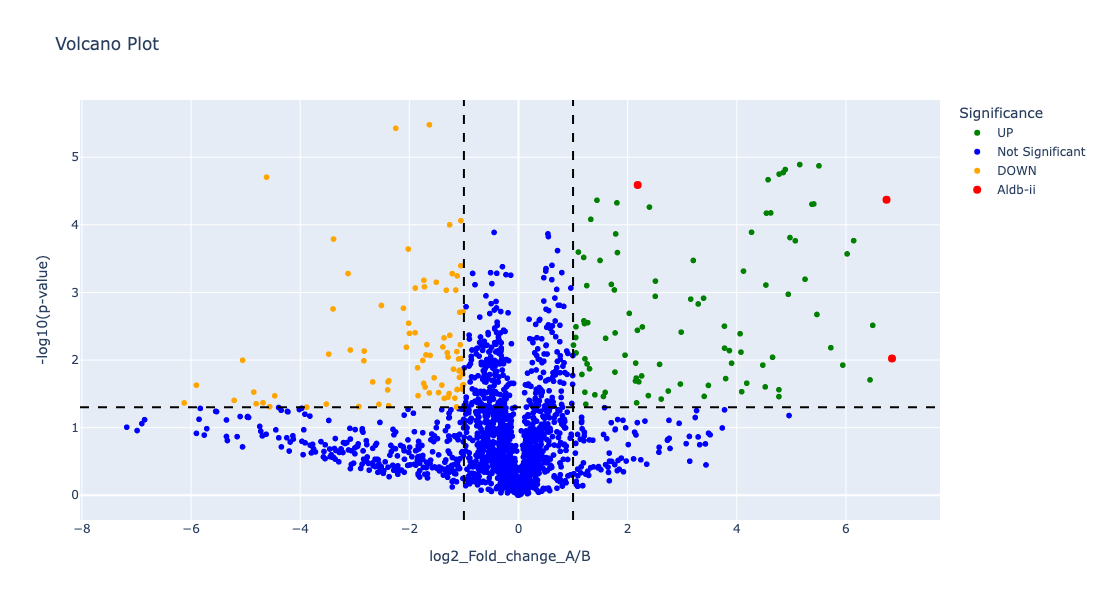

In [39]:
# Plot the rest of the data
fig = px.scatter(
    df_rest,
    x='log2_Fold_change_A/B',
    y='-log10(p-value)',
    color='Significance',
    color_discrete_map={
        "UP": "green",
        "DOWN": "orange",
        "Not Significant": "blue"
    },
    hover_data=['Protein'],
    title='Volcano Plot',
    width=800,
    height=600
)

# Add the highlighted protein in red
fig.add_scatter(
    x=df_highlight['log2_Fold_change_A/B'],
    y=df_highlight['-log10(p-value)'],
    mode='markers',
    marker=dict(color='red', size=8, symbol='circle'),
    name='Aldb-ii'
)

# Add cutoff lines
fig.add_vline(x=-1, line_dash="dash", line_color="black")
fig.add_vline(x=1, line_dash="dash", line_color="black")
fig.add_hline(y=1.3, line_dash="dash", line_color="black")

fig.show()

In [40]:

# Separate highlighted and remaining data
df_highlight = df[df['Protein'].isin(highlight_proteins)]
df_rest = df[~df['Protein'].isin(highlight_proteins)]

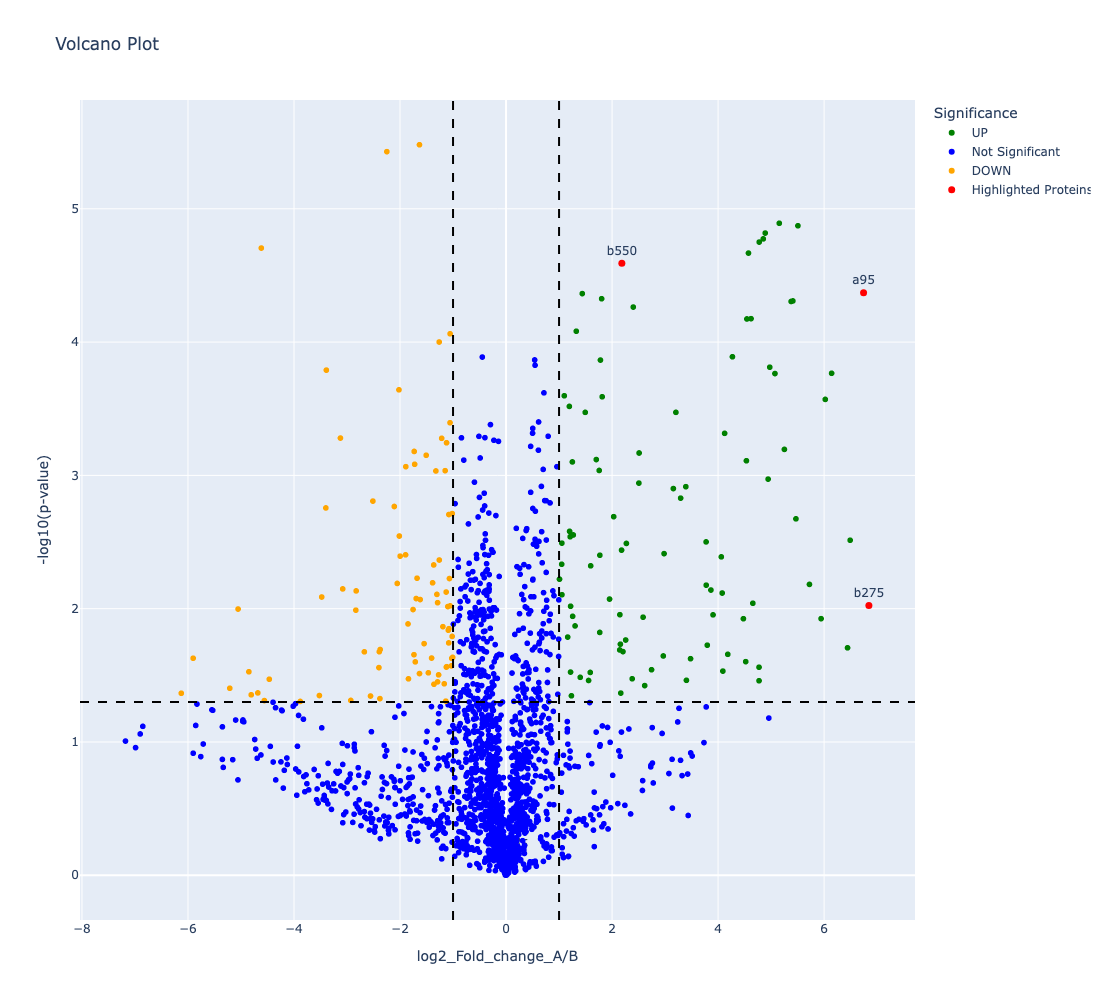

In [41]:
# Plot the rest of the data with default colors
fig = px.scatter(
    df_rest,
    x='log2_Fold_change_A/B',
    y='-log10(p-value)',
    color='Significance',
    color_discrete_map={
        "UP": "green",
        "DOWN": "orange",
        "Not Significant": "blue"
    },
    hover_data=['Protein'],
    title='Volcano Plot',
    width=1200,
    height=1000
)

# Add highlighted proteins in red with labels
fig.add_scatter(
    x=df_highlight['log2_Fold_change_A/B'],
    y=df_highlight['-log10(p-value)'],
    mode='markers+text',
    marker=dict(color='red', size=7, symbol='circle'),
    text=df_highlight['Protein'],
    textposition='top center',
    name='Highlighted Proteins'
)

# Add cutoff lines
fig.add_vline(x=-1, line_dash="dash", line_color="black")
fig.add_vline(x=1, line_dash="dash", line_color="black")
fig.add_hline(y=1.3, line_dash="dash", line_color="black")

fig.show()

In [42]:
# p adjusted  p_adjusted(BH)

In [43]:
# Compute -log10(p-value)
df['-log10(p_adjusted(BH))'] = -np.log10(df['p_adjusted(BH)'])

conditions = [
    (df['p_adjusted(BH)'] < 0.05) & (df['log2_Fold_change_A/B'] > 1),
    (df['p_adjusted(BH)'] < 0.05) & (df['log2_Fold_change_A/B'] < -1)
]
choices = ['UP', 'DOWN']
df['Significance'] = np.select(conditions, choices, default='Not Significant')

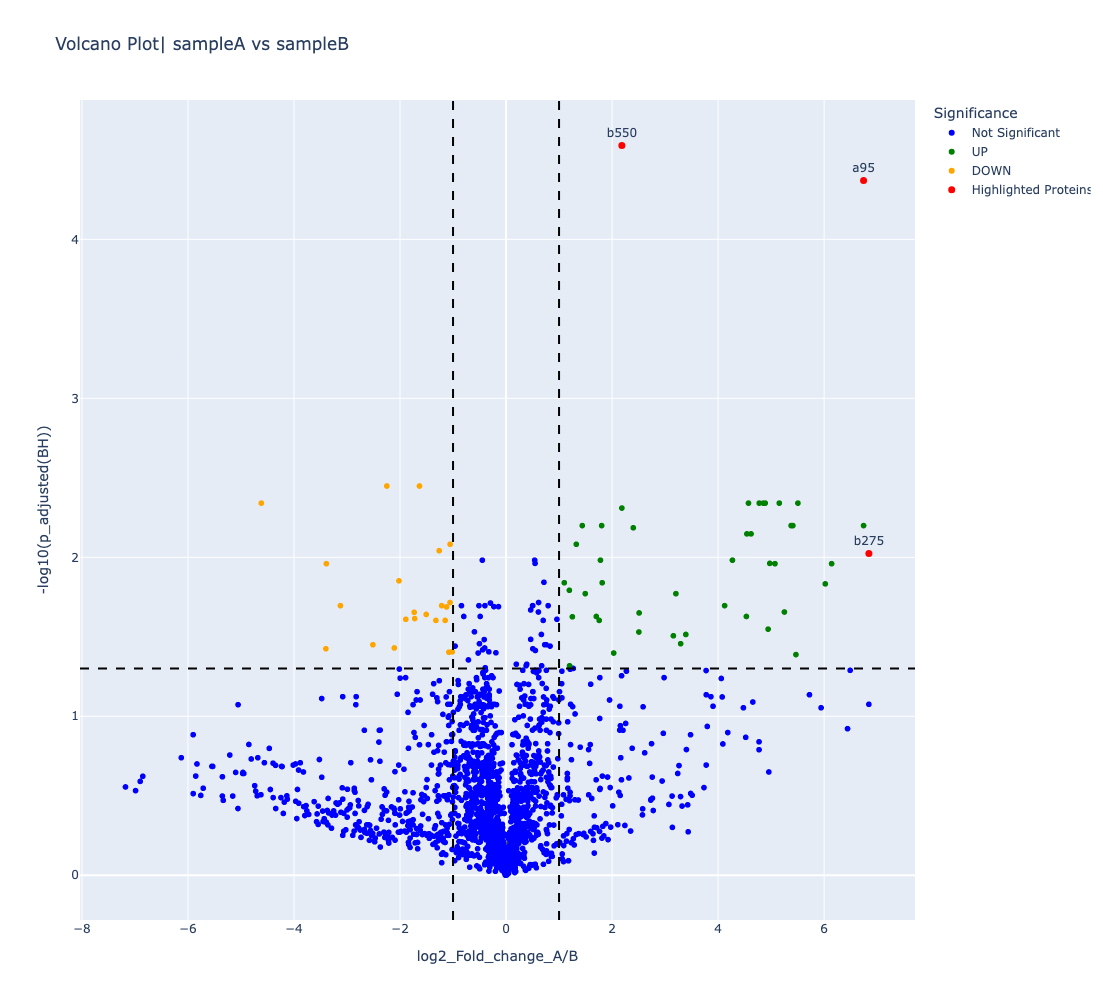

In [46]:
fig = px.scatter(
    df,
    x='log2_Fold_change_A/B',
    y='-log10(p_adjusted(BH))',
    color='Significance',
    color_discrete_map={
        "UP": "green", 
        "DOWN": "orange", 
        "Not Significant": "blue"
    },
    hover_data=['Protein'],
    title='Volcano Plot| sampleA vs sampleB',
    width=1200,   # Increased width
    height=1000   # Increased height
)

# Add highlighted proteins in red with labels
fig.add_scatter(
    x=df_highlight['log2_Fold_change_A/B'],
    y=df_highlight['-log10(p-value)'],
    mode='markers+text',
    marker=dict(color='red', size=7, symbol='circle'),
    text=df_highlight['Protein'],
    textposition='top center',
    name='Highlighted Proteins'
)
# Add cutoff lines
fig.add_vline(x=-1, line_dash="dash", line_color="black")
fig.add_vline(x=1, line_dash="dash", line_color="black")
fig.add_hline(y=1.3, line_dash="dash", line_color="black")

fig.show()